# Machine learning - a mini course

This training material is developed by Dr. Yang Song at UNC Wilmington.

This work is supported by NSF #2230046. You can use my material for non-commercial purposes. But please retain proper attribution by keeping this content.



## 1. What is machine learning
- Machine learning is a method of data analysis that automates analytical model building.
- Using algorithms that iteratively learn from data, machine learning allows computers to find hidden insights without being explicitly programmed where to look.

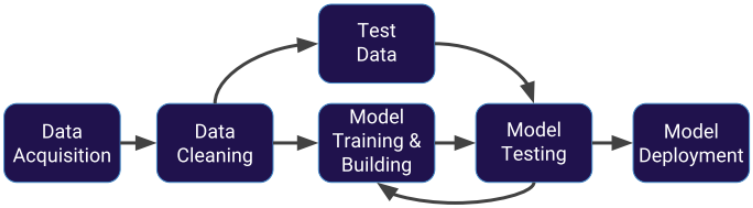





###  supervised and unsupervised

**Supervised learning** algorithms are trained using *labeled* examples or data points attached with *actual values* (**ground truth**), such as an input where the desired  output is known. For example, a piece of equipment could have data points labeled either “F” (failed) or “R” (runs).

- The learning algorithm receives a set of inputs along with the corresponding correct outputs, and the algorithm learns by comparing its actual output with correct outputs to find errors.
- It then modifies the model accordingly.
- Through methods like classification, regression, prediction and gradient boosting, supervised learning uses patterns to predict the values of the label on additional unlabeled data.
- Supervised learning is commonly used in applications where historical data predicts likely future events.


In [ ]:
import pandas as pd
import numpy as np

How can I make predictions about real-world quantities, such as the water-dissolved oxygen in Cape Fear River, or the flounder population this year?

Answering questions like these requires us to create a **model**.

A model is a formula where one variable (response) varies depending on one or more independent variables (covariates). For the dissolved oxygen (DO) example, the target value DO might depend on season, water discharge, and others.

One of the simplest models we can create is a Linear Model, where we start with the assumption that the dependent variable varies linearly with the independent variable(s).

## 2. General supervised machine learning pipeline - Linear regression as an example

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
# Create toy data
X, y = np.arange(10).reshape((5,2)),range(1,6)
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [ ]:
# y is a range, so we have to cast to list to see the items inside
list(y)

[1, 2, 3, 4, 5]

### Splitting the training and testing datasets

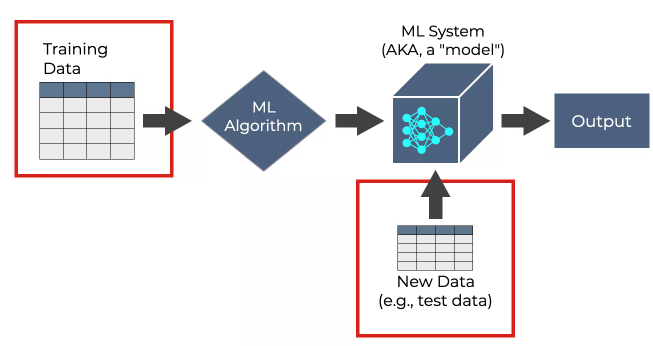

In [ ]:
# Split the training set and the testing set
# in this case, 40% of the samples are used for testing.
# Run this cell again to shuffle and split again.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4)
X_train

array([[0, 1],
       [6, 7],
       [2, 3]])

In [ ]:
y_train

[1, 4, 2]

In [ ]:
X_test

array([[8, 9],
       [4, 5]])

In [ ]:
y_test

[5, 3]

### Making and training your model

In [ ]:
# Create a linear regression model
model = LinearRegression()
print(model)

LinearRegression()


In [ ]:
# Train the linear regression model with the training data
model.fit(X_train, y_train)

LinearRegression()

### Making a prediction

In [ ]:
# Make a prediction using the testing data.
predictions = model.predict(X_test)
predictions

array([5., 3.])

### Mean absolute percentage error (MAPE) regression loss.

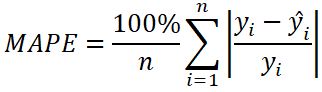

In [ ]:
# Evaluate the model performance using MAPE
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, predictions)

0.0

## 3. Linear regression

In statistics, linear regression is a method to predict a target variable by fitting the best linear relationship between the dependent and independent variables. The best fit is done by making sure that the sum of all the distances between the shape and the actual observations at each point is as small as possible. The fit of the shape is “best” in the sense that no other position would produce less error given the choice of shape.

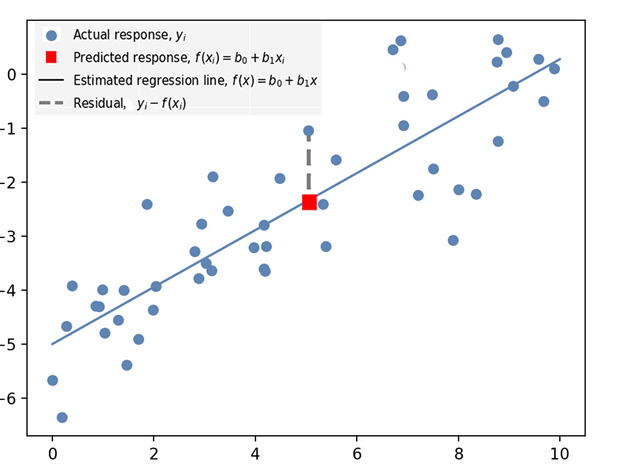

In [ ]:
# This part of code requires you to connect your *entire* google drive to this notebook.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Please download seaice.csv [here](https://drive.google.com/file/d/1LjJoo_70CGCY0fnusqOx55Bb4Yoltp_E/view?usp=sharing).

In [ ]:
ice_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/seaice.csv')
ice_df.head()

,Year,Month,Day,Extent,Missing,Source Data,hemisphere
0,1978,10,26,10.231,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
1,1978,10,28,10.420,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
2,1978,10,30,10.557,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
3,1978,11,1,10.670,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
4,1978,11,3,10.777,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north


In [ ]:
ice_df.columns  # there is an issue with this data - some columns have additionan spaces.

Index(['Year', ' Month', ' Day', '     Extent', '    Missing', ' Source Data',
       'hemisphere'],
      dtype='object')

In [ ]:
# "clean" the column names
clean_column_names = list(map(str.strip, ice_df.columns.values.tolist()))
clean_column_names

['Year', 'Month', 'Day', 'Extent', 'Missing', 'Source Data', 'hemisphere']

In [ ]:
# update the column names so they don't have additional white spaces.
ice_df.columns = clean_column_names
ice_df.head()

,Year,Month,Day,Extent,Missing,Source Data,hemisphere
0,1978,10,26,10.231,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
1,1978,10,28,10.420,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
2,1978,10,30,10.557,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
3,1978,11,1,10.670,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
4,1978,11,3,10.777,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north


In [ ]:
# The feature "hemisphere" is a categorical feature, let's see how many distinct values are in this column.
ice_df.hemisphere.value_counts()

hemisphere
north    13177
south    13177
Name: count, dtype: int64

In [ ]:
ice_df = ice_df.drop('Source Data', axis=1) # drop the "Source Data" column
ice_df

,Year,Month,Day,Extent,Missing,hemisphere
0,1978,10,26,10.231,0.0,north
1,1978,10,28,10.420,0.0,north
2,1978,10,30,10.557,0.0,north
3,1978,11,1,10.670,0.0,north
4,1978,11,3,10.777,0.0,north
...,...,...,...,...,...,...
26349,2019,5,27,10.085,0.0,south
26350,2019,5,28,10.078,0.0,south
26351,2019,5,29,10.219,0.0,south
26352,2019,5,30,10.363,0.0,south


In [ ]:
# another minor thing to fix - let's convert the "hemisphere" into two binary features
# we are doing this because most of machine learning models do not take categorial features
ice_df = pd.get_dummies(data=ice_df, columns=['hemisphere'])
ice_df.head()

,Year,Month,Day,Extent,Missing,hemisphere_north,hemisphere_south
0,1978,10,26,10.231,0.0,True,False
1,1978,10,28,10.420,0.0,True,False
2,1978,10,30,10.557,0.0,True,False
3,1978,11,1,10.670,0.0,True,False
4,1978,11,3,10.777,0.0,True,False


In [ ]:
ice_df_train = ice_df[ice_df.Year<2019] # all the years before 2019 as training
ice_df_test = ice_df[ice_df.Year==2019] # data points in 2019 as testing

In [ ]:
# Separate the features as X, and target values (Extent column)
y_train = ice_df_train.Extent
y_test = ice_df_test.Extent
X_train = ice_df_train.drop("Extent", axis = 1)
X_test = ice_df_test.drop("Extent", axis = 1)
print(X_test.shape)
print(X_train.shape)

(302, 6)
(26052, 6)


In [ ]:

# Create a linear regression model
model = LinearRegression()

# Train the linear regression model
model.fit(X_train, y_train)

# Make a prediction with the testing data
y_pred = model.predict(X_test)

# Evaluate the prediction with MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"MAPE: {mape}")


MAPE: 1107541805887318.4


## 4. Classfication - Logistic regression as an example


###  classification vs. prediction
"Data Mining Concepts and Techniques" by Han and Kamber

- predicting class labels is **classification**
- predicting values (e.g. using regression techniques) is **prediction**.

**Logistic Regression** is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary). Like all regression analyses, the logistic regression is a predictive analysis. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.


The datasets can be downloaded [here](https://drive.google.com/file/d/16383qMpyll_AgluWrM7vf6t9YkvqdgKR/view?usp=sharing) and [here](https://drive.google.com/file/d/1yRq4frokfTT5KOBOG90rGnGFxi41IpJy/view?usp=sharing).

In [ ]:
df_0_full = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/absence.txt', sep='\t')
df_1_full = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/presence.txt', sep='\t')

In [ ]:
#There are two parts in this dataset, one file has all the samples without seagrass, and another one has the samples that seagrass is present.
# So we add a new column to each part of the data showing whether there was seagrass with 0 or 1.
df_0_full['Seagrass_class'] = 1
df_1_full['Seagrass_class'] = 0
df_full = pd.concat([df_0_full,df_1_full])

# In the dataset, we also have "BIO_CLASS" column. If the seagrass is absent, then the value is "absense";
# if the seagrass is present, then it will show the type of seagrass. There are around 10 different types of seagrass.
# We drop this column for now to make this task a binary classification.
# But later in this notebook, we will also try to predict the BIO_CLASS value.
df_full = df_full.drop('BIO_CLASS', axis=1)
df_full.head()

,ID,LONGITUDE,LATITUDE,VOTEMPER_2015-01-01,VOTEMPER_2015-02-01,VOTEMPER_2015-03-01,VOTEMPER_2015-04-01,VOTEMPER_2015-05-01,VOTEMPER_2015-06-01,VOTEMPER_2015-07-01,...,minVHM0_year,Med_bathym,Distance_to_Major_Cities,Distance_to_Complete_Cities,Distance_to_Port,Distance_to_Major_River,Distance_to_Complete_River,Distance_to_Coast,Substrate,Seagrass_class
0,1772,-5.3750,36.125122,15.8675,14.8307,15.0792,16.1474,17.9515,19.5731,22.1989,...,0.083605,-72.6291,0.023322,0.026314,0.026314,1.150390,0.065780,0.017833,Sand,1
1,1773,-1.2500,37.562500,15.2587,14.1531,14.4879,16.0270,19.9450,22.7262,27.3235,...,0.233630,-19.1105,0.433315,0.012279,0.267479,1.638029,0.026680,0.003007,SeabedSandy mud,1
2,1774,3.0625,42.562500,12.6953,10.6845,11.7425,14.2560,17.0728,20.9769,24.1902,...,0.139023,-18.7389,1.323963,0.018954,0.070956,1.178702,0.016667,0.017652,Dead mattes of Posidonia oceanica,1
3,1775,3.0625,42.625122,12.6688,10.6751,11.6992,14.2349,16.9897,20.9067,24.1144,...,0.137059,-24.5444,1.274796,0.030035,0.121230,1.180251,0.028006,0.024519,Posidonia oceanica meadows,1
4,1776,3.0625,42.687500,12.5770,10.5964,11.6294,14.2196,16.9326,20.8726,24.0550,...,0.135447,-25.9972,1.227040,0.031258,0.179215,1.185086,0.035355,0.025689,Posidonia oceanica meadows,1


In [ ]:
# dataframe.info() call doesn't show information each column because there r so many,
df_full.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 3055 entries, 0 to 1770
Data columns (total 221 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    ID                             3055 non-null   int64  
 1    LONGITUDE                      3055 non-null   float64
 2    LATITUDE                       3055 non-null   float64
 3    VOTEMPER_2015-01-01            3055 non-null   float64
 4    VOTEMPER_2015-02-01            3055 non-null   float64
 5    VOTEMPER_2015-03-01            3055 non-null   float64
 6    VOTEMPER_2015-04-01            3055 non-null   float64
 7    VOTEMPER_2015-05-01            3055 non-null   float64
 8    VOTEMPER_2015-06-01            3055 non-null   float64
 9    VOTEMPER_2015-07-01            3055 non-null   float64
 10   VOTEMPER_2015-08-01            3055 non-null   float64
 11   VOTEMPER_2015-09-01            3055 non-null   float64
 12   VOTEMPER_2015-10-01            3055 n

In [ ]:
# One-hot encoding, there is only one categorical feature to handle.
# This time, we also set  drop_first parameter as True. Why?
df_full = pd.get_dummies(data=df_full, columns=['Substrate'], drop_first=True)

In [ ]:
# The classification target is Seagrass_class column. Let's check if the positive and negative samples are balanced.
df_full.Seagrass_class.value_counts()

Seagrass_class
0    1771
1    1284
Name: count, dtype: int64

In [ ]:
# Train-test split, keep 10% for testing
y = df_full.Seagrass_class
X = df_full.drop("Seagrass_class", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=444)

# Let's make a logistic regression model, train it, and make a prediction.
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='saga', max_iter=300)
lr_model.fit(X_train, y_train)
prediction = lr_model.predict(X_test)
prediction  # What do you see? Does this look strange?

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# This is a classification problem, and we can evaluate the model with accuracy score.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction) # Is this result good or bad?

0.5882352941176471

## 5. Resampling

Resampling is the method that consists of drawing repeated samples from the original data samples.


In [ ]:
from sklearn.utils import resample
# Did you see the former logistic regression model didn't converge? Let try to make the fewer samples, plus, make the two classes balanced.
df_0_resample = resample(df_0_full, replace=False, n_samples=100)
df_1_resample = resample(df_1_full, replace=False, n_samples=100)
df_resample = pd.concat([df_0_resample,df_1_resample])
df_resample = df_resample.drop('BIO_CLASS', axis=1)
df_resample.shape

(200, 221)

In [ ]:
df_resample = pd.get_dummies(data=df_resample, columns=['Substrate'], drop_first=True) # Run this cell the 2nd time and you will receive an error, why? ;-)

In [ ]:
# The same data processing, just with the resampled data.
y = df_resample.Seagrass_class
X = df_resample.drop("Seagrass_class", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=444)

# Exercise 2 - make a logistic regression model with your resampled dataset. Show your prediction results.



In [ ]:
# what's the accuracy score for this model?
accuracy_score(y_test, prediction)

1.0

## 6. Tree-based models - decision as an example

Decision Trees are an important type of algorithm for predictive modeling machine learning.

The representation for the decision tree model is a binary tree. This is your binary tree from algorithms and data structures, nothing too fancy. Each node represents a single input variable (x) and a split point on that variable (assuming the variable is numeric).

The leaf nodes of the tree contain an output variable (y) which is used to make a prediction.

To visualize a decision tree, [here](https://mljar.com/blog/visualize-decision-tree/) is an article with different approaches.

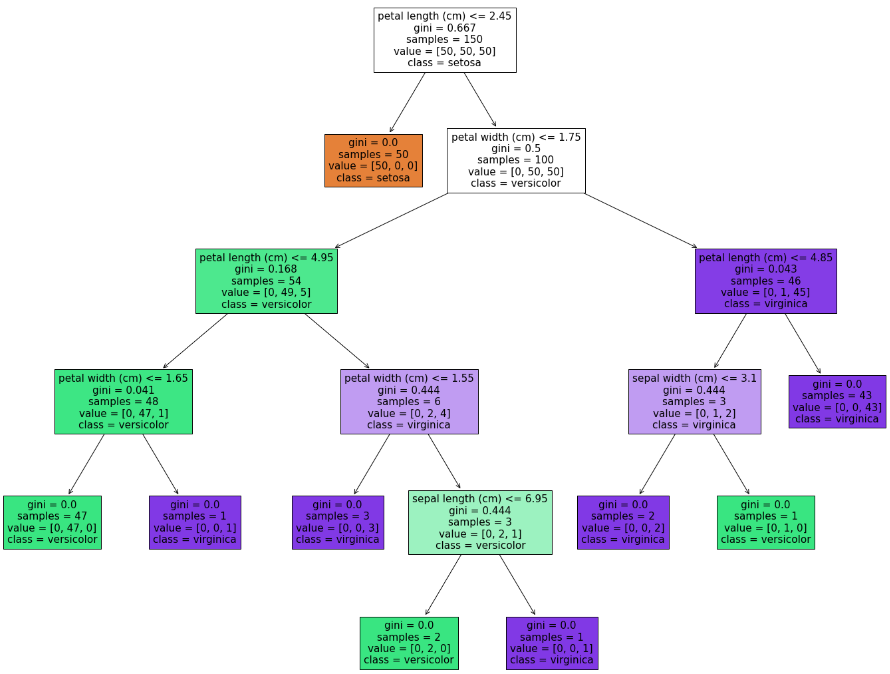

Let's make a multiple class model - the target column is BIO_CLASS.

The code below makes the full dataset ready, and provides a value counts of the target column.

In [ ]:
# We re-read the seagrass data, this time, we will make the classification on the "BIO_CLASS" column.
df_0_full = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/absence.txt', sep='\t')
df_1_full = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/presence.txt', sep='\t')
df_full = pd.concat([df_0_full,df_1_full])
df_full = pd.get_dummies(data=df_full, columns=['Substrate'], drop_first=True) # the same one-hot encoding

df_full.BIO_CLASS.value_counts() # This is likely to be a challenging classification. Why?
                                 # A good multiple-class classfication model may also be a biased model with this dataset, why?

BIO_CLASS
absence                                  1284
Cymodocea nodosa                         1265
Posidoniaceae Posidonia oceanica          125
Zostera noltii                            103
Halophila stipulacea                       83
Cymodoceaceae Cymodocea nodosa             72
Zostera marina                             54
Zosteraceae Zostera noltii                 23
Ruppia cirrhosa                            19
Hydrocharitaceae Halophila stipulacea      11
Ruppia maritima                             9
Zosteraceae Zostera marina                  7
Name: count, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier() # create a decision tree model with no parameters specified.

# The classification target is BIO_CLASS column.
y = df_full.BIO_CLASS
X = df_full.drop("BIO_CLASS", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=222) # We are doing 50-50% split for training and testing
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
accuracy_score(y_test, prediction)

0.9928010471204188

In [ ]:
X_train.shape

(1527, 229)

## 7. Regularization

Regularization refers to techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting.

For a decision tree model, if we do not apply any regularization, it is likely to be a over-fitted tree.



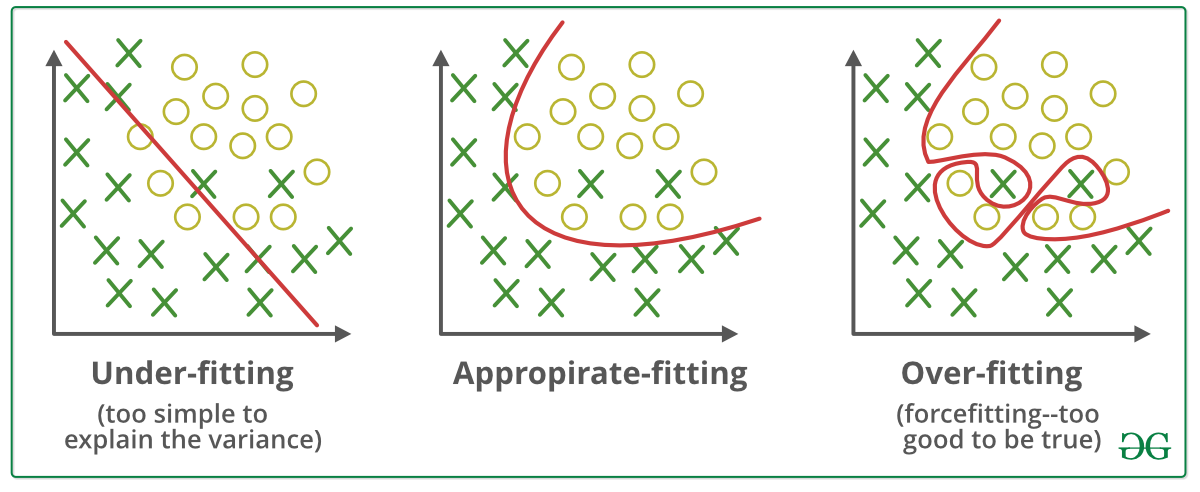

In [ ]:
# Let's see the details of our decision tree from section 6.
print(clf.get_n_leaves())

13


In [ ]:
# The depth is 7. Is this too high? Do you remember how many features do we have in the seagrass data?
clf.get_depth()

7

For this problem, to make the decision tree better for the multiple-lable classification problem, the necessary steps should be:


1.   balance the data with
2.   create decision tree models with a) lower depth or b) fewer leaves.



In [ ]:
clf = DecisionTreeClassifier(max_depth = 6, min_samples_split = 3, max_leaf_nodes=12)
# max_depthint - The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure.
# min_samples_split - The minimum number of samples required to split an internal node. (default = 2)
# max_leaf_nodes - Grow a tree with max_leaf_nodes in best-first fashion.

## 8. Dimension Reduction - PCA as an example

Principal Component Analysis is basically a statistical procedure to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables.

Each of the principal components is chosen in such a way that it would describe most of them still available variance and all these principal components are orthogonal to each other. In all principal components, first principal component has a maximum variance.

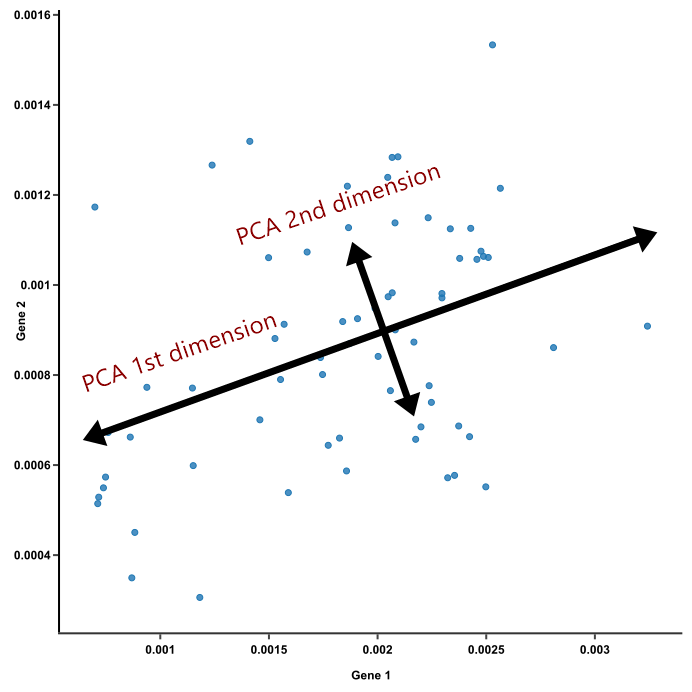

In [ ]:
# Let's see the shape of the X_train and X_test (they are from part 7)
X_train.shape

(1527, 229)

In [ ]:
X_test.shape

(1528, 229)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)  # The primary component number doesn't have to be 2. Let's make it 5. =)
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)

In [ ]:
X_train_PCA.shape

NameError: name 'X_train_PCA' is not defined

In [ ]:
# Exercise 3 - make use of a regulated decision tree, and make a prediction on the PCA-processed dataset.
# When doing the regularization, consider there are only 5 features in the PCA-processed dataset.



# Show your accuracy score.



0.993455497382199

## 9. Nonlinear Prediction Models - Polynomial regression as an exmaple

**Polynomial regression**: This is a form of linear regression in which the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial. Polynomial regression is a good first choice when in need of a nonlinear model because it is a simple and interpretable model. It can model a wide range of nonlinear relationships by adding polynomial terms to the linear model. Additionally, it is easy to implement.



In [ ]:
ice_df_train.head(2)

,Year,Month,Day,Extent,Missing,hemisphere_north,hemisphere_south
0,1978,10,26,10.231,0.0,True,False
1,1978,10,28,10.420,0.0,True,False


In [ ]:
ice_y_train = ice_df_train.Extent
ice_y_test = ice_df_test.Extent
ice_X_train = ice_df_train.drop("Extent", axis = 1)
ice_X_test = ice_df_test.drop("Extent", axis = 1)

In [ ]:
ice_X_train.shape

(26052, 6)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
ice_train_poly = polynomial_converter.fit_transform(ice_X_train)
ice_test_poly = polynomial_converter.transform(ice_X_test)

In [ ]:
ice_train_poly.shape # Wow, why there are so many featuers?

(26052, 27)

Please also notice that, the new dataset with polynomial features is a numpy array. We don't have feature names.

Now that we have the polynomial features, and we can continue the linear regression model (but because we have polynomial features, this is a polynomial regression model now).

In [ ]:
model = LinearRegression()
model.fit(ice_X_train, ice_y_train)
predictions = model.predict(ice_X_test)
mean_absolute_percentage_error(ice_y_test, predictions)

0.8965002273666606

Pros and Cons of Nonlinear Regression

NONLINEAR REGRESSION PROS:
+ It allows for more flexibility in modeling the relationship between the dependent and independent variables, as it can capture non-linear and non-additive relationships. This is particularly useful when the relationship between the variables is **complex** and cannot be accurately represented by a linear model.
+ It may take into account a wider variety of underlying distributions and better represent non-normal data, improving predictions, and providing new insights into the relationship between variables.
+ In general, nonlinear regression has the capabilities to deal with more complex relationships between your features and your label.

NONLINEAR REGRESSION CONS:
- Typically, it will be more **computationally expensive** and time consuming than just linear regression, due to the additional workload of the higher order models.
- Depending on the data and use case, it can sometimes be difficult to directly interpret a nonlinear model’s results. For example, the intuition behind a higher order feature is hard to comprehend for most people.

## 10. Clustering - Kmeans as an example

So far, we only have discussed supervised learning techniques, in which the class lables/actual values (Dr. Song prefers the term **ground truth**) are known. Another set of techniques can be used when the groups (categories) of data are not known. They are called unsupervised as it is left to the learning algorithm to figure out patterns in the data provided.



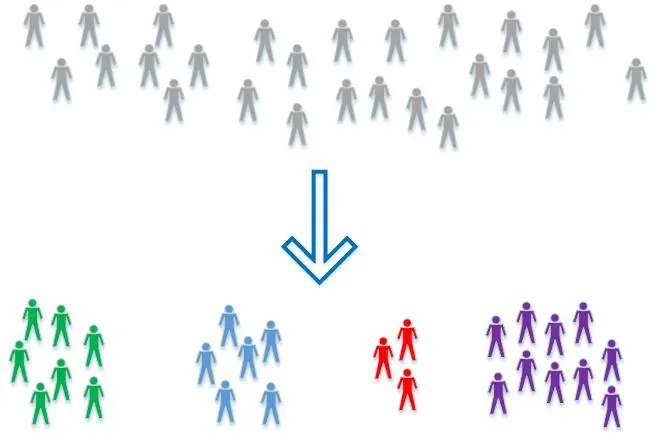

Here we have a dataset with four different fish species and six features. Can we use clustering to find which samples belong to the same species?

The fish dataset for clustering can be found [here](https://drive.google.com/file/d/19jri5v0q52P0ukxpx8bPpT6BY0gLLstq/view?usp=sharing).

In [ ]:
fish_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/fish_clustering.csv')
fish_df.head()

,f1,f2,f3,f4,f5,f6
0,242.0,23.2,25.4,30.0,38.4,13.4
1,290.0,24.0,26.3,31.2,40.0,13.8
2,340.0,23.9,26.5,31.1,39.8,15.1
3,363.0,26.3,29.0,33.5,38.0,13.3
4,430.0,26.5,29.0,34.0,36.6,15.1


Here is a new trick - we pack two components into a pipeline - a standard scaler and a KMeans clustering model.

A **standard scaler** standardizes features by removing the mean and scaling to unit variance.

The standard score of a sample *x* is calculated as:

z = (x - u) / s

where *u* is the mean of the training samples, and *s* is the standard deviation of the training samples.

**K-means** clustering is one of the simplest and popular unsupervised clustering algorithms. We specify that there are 4 clusters in this dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans, specify the n_clusters as 4
kmeans = KMeans(n_clusters=4)

# Create pipeline with the scaler instance and Kmeans model: pipeline
pipeline = make_pipeline(scaler, kmeans)



In [ ]:
# Fit the pipeline to samples
pipeline.fit(fish_df)

# Calculate the cluster labels: labels, the labels should be 0, 1, 2 or 3
labels = pipeline.predict(fish_df)

fish_df["cluster_label"] = labels
fish_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,f1,f2,f3,f4,f5,f6,cluster_label
0,242.0,23.2,25.4,30.0,38.4,13.4,2
1,290.0,24.0,26.3,31.2,40.0,13.8,1
2,340.0,23.9,26.5,31.1,39.8,15.1,1
3,363.0,26.3,29.0,33.5,38.0,13.3,1
4,430.0,26.5,29.0,34.0,36.6,15.1,1


References -


1.   https://github.com/khanhnamle1994/statistical-learning
2.   Machine Learning Algorithms Mini-Course by Jason Brownlee. https://machinelearningmastery.com/machine-learning-algorithms-mini-course/
3.   Daily Sea Ice Extent Data by NATIONAL SNOW AND ICE DATA CENTER. https://www.kaggle.com/datasets/nsidcorg/daily-sea-ice-extent-data
4.   Seagrass and Hydrographic Data. https://www.kaggle.com/datasets/saurabhshahane/seagrass-and-hydrographic-data
5.   Machine Learning with Python: Nonlinear Regression by Pierian Training. https://pieriantraining.com/nonlinear-regression-in-machine-learning-python/


Remember to turn in this notebook to Canvas. There are three exercises in this notebook.